# GPU 확인

In [3]:
!nvidia-smi

Wed Feb 16 02:39:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 패키지 로드

In [4]:
import os
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 데이터셋 준비

In [5]:
!wget https://github.com/AakashKumarNain/CaptchaCracker/raw/master/captcha_images_v2.zip
!unzip -q captcha_images_v2.zip

--2022-02-16 02:40:14--  https://github.com/AakashKumarNain/CaptchaCracker/raw/master/captcha_images_v2.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AakashKumarNain/CaptchaCracker/master/captcha_images_v2.zip [following]
--2022-02-16 02:40:15--  https://raw.githubusercontent.com/AakashKumarNain/CaptchaCracker/master/captcha_images_v2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9075967 (8.7M) [application/zip]
Saving to: ‘captcha_images_v2.zip’

captcha_images_v2.z 100%[===================>]   8.66M  --.-KB/s    in 0.09s   

2022-02-16 02:40:15 (95.9 MB/s) - ‘captcha_images_v2.zip’

# 데이터셋 확인

In [6]:
img_list = glob('captcha_images_v2/*.png')

len(img_list)

1040

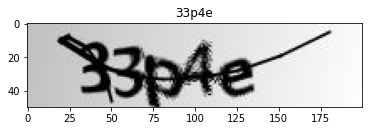

In [7]:
img = cv2.imread(img_list[0])

label = os.path.splitext(os.path.basename(img_list[0]))[0]

plt.title(label)
plt.imshow(img)

# 데이터 전처리

In [8]:
imgs = []
labels = []
max_length = 0 # 전체 글자의 개수 선언 및 초기화

for img_path in img_list:
  imgs.append(img_path)

  label = os.path.splitext(os.path.basename(img_path))[0] # 확장자 제거 후 label에 저장
  labels.append(label) # labels에 모두 저장

# 전체 글자의 개수 카운트
  if len(label) > max_length:
    max_length = len(label)

print(len(imgs), len(labels), max_length)

1040 1040 5


In [9]:
# label들을 공백없이 이어붙인 후 unique한 character만 추출.

''.join(labels)

'33p4ep8ngxybfx62g783y2436g7fmcf85y32cg5865m853mxdndd7643fbxdg3ex38w7548wy7dymp7ggc277d22bd8b7355np4m76353gy5bfn5wbgwf68424pew8e32mw2e87f2m8n646x86cwxegfxccc753eg2fnw2b827e7nx4cy3nw53mn84dgf7ddnpf6xxdxwc2bdgegw4gnc3nnd5wgy4n6mmd344w2n7ex2cnnb55d6bny23243mmx7547wfy5m6825yn7g4f74853bn5mwgd8fb6b4w6537nffy2ndpmd3wexycnb43nw2wc386g45w25egpxfg65bnc5fmmg2m5bb665p3mmpn7pn3xng678eecwg62547e4pe6b7yygennf7ceynfbg8nfndwc7nn8dw8d38n65nyyg5ge8e5e2ycn87y2x4f753fbgem5e3ndn8y63fc4mcm8c23fnngxcn5n8bw4x2mb4ncnegxmp478nx38n57yew6p6m5egxf4p4nf2n8pm47fn4b4mgn2d3nxxf8fp762bd3b7cd6p45f3gf2enf43eny7x7422bnc2fgdng3d7en34nnf325p2m5xd2e3p4nn33b224cfw8ng46m6ydypy5dppnybcxygfwepgwnp52447f858xpnnwyb2nen3bx868eggge72cdy2xg4d3c7ym457dmwdf6yxd7m8n5p3nc4ygyg5bbx8xnpfg38b6e554xxbm5g55b4x5nynnbfx5cfc56g78gncdfen68x48dyxncndecccnex4ccn2xdyp7n3pe4g73mnx378e58ne4gcfc2yp2m6n6fn84w7e6mpnmxf678w36ecbn4dw3w7wyp4xe8xme43ym264m5nb267yy824yw667cpc8c2mg87neggnffpxfxmcymf5cm2c6f8g44xe8nny5e2wx73467d5w2yp74gb3fdmw8ncen556end3w8f36fp5w

In [10]:
characters = set(''.join(labels)) # set type으로 바꿔 중복된 값 모두 제거
characters

{'2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y'}

# 라벨 인코딩
(라벨을 숫자로 인코딩)

In [11]:
char_to_num = layers.experimental.preprocessing.StringLookup(
    vocabulary=list(characters), num_oov_indices=0, mask_token=None
) # StringLookup을 통해 list의 characters와 숫자를 자동으로 1:1 매칭 함

num_to_char = layers.experimental.preprocessing.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), num_oov_indices=0, mask_token=None, invert=True
) # num to char 로 디코딩 / invert = True

# char to num 인코딩 검증
print(labels[0])
encoded = char_to_num(tf.strings.unicode_split(labels[0], input_encoding='UTF-8'))
print(encoded)

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


33p4e
tf.Tensor([5 5 1 8 7], shape=(5,), dtype=int64)


In [12]:
# num to char 디코딩 검증
tf.strings.reduce_join(num_to_char(encoded)).numpy().decode('utf-8')
#.numpy()까지만 실행할 경우 byte array로 나옴 .
# decode('utf-8')을 통해 byte array를 string으로 변환

'33p4e'

# 데이터셋 분리

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(imgs, labels, test_size=0.1, random_state=2022)

print(len(x_train), len(y_train))
print(len(x_val), len(y_val))

936 936
104 104


# Data Generator 생성

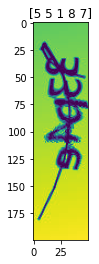

In [14]:
img_width = 200
img_height = 50

def encode_single_sample(img_path, label):
  # 1. 이미지 읽기
  img = tf.io.read_file(img_path)
  # 2. 디코딩, 그레이스케일(1채널짜리 이미지)로 변환
  img = tf.io.decode_png(img, channels=1)
  # 3. 8비트 이미지에서 32비트 이미지로 변환
  img = tf.image.convert_image_dtype(img, tf.float32)
  # 4. 원하는 사이즈로 이미지 크기 조정 
  img = tf.image.resize(img, [img_height, img_width])
  # 5. 이미지의 높이와 폭을 바꿔줌. 앞자리부터 순서대로 분석하기 위해서 위에서부터 아래로 분석.
  img = tf.transpose(img, perm=[1, 0, 2])
  # 6. char to num을 통해 label 인코딩
  label = char_to_num(tf.strings.unicode_split(label, input_encoding='UTF-8'))
  # 7. image에는 img, lable에는 lable이 들어가는 dictionary에 저장하여 리턴함.
  return {'image': img, 'label': label}


# 변환된 이미지와 라벨 확인
preview = encode_single_sample(imgs[0], labels[0])

plt.title(str(preview['label'].numpy()))
plt.imshow(preview['image'].numpy().squeeze())

# 데이터셋 정의

In [15]:
batch_size = 32

# tf.data.Dataset을 통해 빠르게 학습을 할 수 있음.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
validation_dataset = (
    validation_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

print(train_dataset)
print(validation_dataset)

<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, 200, 50, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}>
<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, 200, 50, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}>


# 모델 정의

In [22]:
# CTCLayer를 통해 분석
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype='int64')
        input_length = tf.cast(tf.shape(y_pred)[1], dtype='int64')
        label_length = tf.cast(tf.shape(y_true)[1], dtype='int64')

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype='int64')
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype='int64')

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred


def build_model():
    # 모델의 input
    input_img = layers.Input(
        shape=(img_width, img_height, 1), name='image', dtype='float32'
              # 200,      50
    )
    labels = layers.Input(name='label', shape=(None,), dtype='float32')

    # First conv block
    # 컨볼루션 한 번, 맥스 풀링 한 번
    x = layers.Conv2D(
        32,
        (3, 3),
        activation='relu',
        kernel_initializer='he_normal',
        padding='same',
        name='Conv1',
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name='pool1')(x)

    # Second conv block
    # 컨볼루션 한 번, 맥스 풀링 한 번
    x = layers.Conv2D(
        64,
        (3, 3),
        activation='relu',
        kernel_initializer='he_normal',
        padding='same',
        name='Conv2',
    )(x)
    x = layers.MaxPooling2D((2, 2), name='pool2')(x)


    # 맥스 풀링을 두 번하게 되어, 차원이 4배로 줄어들게 됨.
    # reshape을 할 때 4씩 나눠줌.
    # 마지막 컨볼루션 레이어에서 64개의 필터 사용 -> 64
    new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name='reshape')(x)
    x = layers.Dense(64, activation='relu', name='dense1')(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    # 양방향/LSTM(노드의 개수 : 128개)
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)

    # 양방향/LSTM(노드의 개수 : 64개)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(
        # 사용한 단어의 개수 + 1 (unknown값 대비)
        len(char_to_num.get_vocabulary()) + 1, activation='softmax', name='dense2'
    )(x)

    # CTC loss를 추가해줘야함.
    # => CTCLayer 정의(라벨, x) 입력
    output = CTCLayer(name='ctc_loss')(labels, x)

    # 모델 정의
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name='ocr_model_v1'
    )
    # Optimizer
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# 모델 생성
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 200, 50, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 Conv1 (Conv2D)                 (None, 200, 50, 32)  320         ['image[0][0]']                  
                                                                                                  
 pool1 (MaxPooling2D)           (None, 100, 25, 32)  0           ['Conv1[0][0]']                  
                                                                                                  
 Conv2 (Conv2D)                 (None, 100, 25, 64)  18496       ['pool1[0][0]']       

# 모델 학습

In [24]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
    #earlystopping : 학습에 진전이, 10번 이상 없으면, 가장 좋은 weight를 복구하고 학습 종료
)

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=100,
    callbacks=[early_stopping],
)

Epoch 1/100
30/30 [==============================] - 5s 173ms/step - loss: 16.3181 - val_loss: 16.3905
Epoch 2/100
30/30 [==============================] - 4s 122ms/step - loss: 16.3181 - val_loss: 16.3886
Epoch 3/100
30/30 [==============================] - 4s 120ms/step - loss: 16.3096 - val_loss: 16.4162
Epoch 4/100
30/30 [==============================] - 4s 122ms/step - loss: 16.3050 - val_loss: 16.4237
Epoch 5/100
30/30 [==============================] - 4s 122ms/step - loss: 16.2898 - val_loss: 16.4239
Epoch 6/100
30/30 [==============================] - 4s 123ms/step - loss: 16.2765 - val_loss: 16.4040
Epoch 7/100
30/30 [==============================] - 4s 122ms/step - loss: 16.2497 - val_loss: 16.3904
Epoch 8/100
30/30 [==============================] - 4s 146ms/step - loss: 16.2211 - val_loss: 16.3306
Epoch 9/100
30/30 [==============================] - 4s 123ms/step - loss: 16.1692 - val_loss: 16.2959
Epoch 10/100
30/30 [==============================] - 4s 123ms/step - los

# 모델 테스트

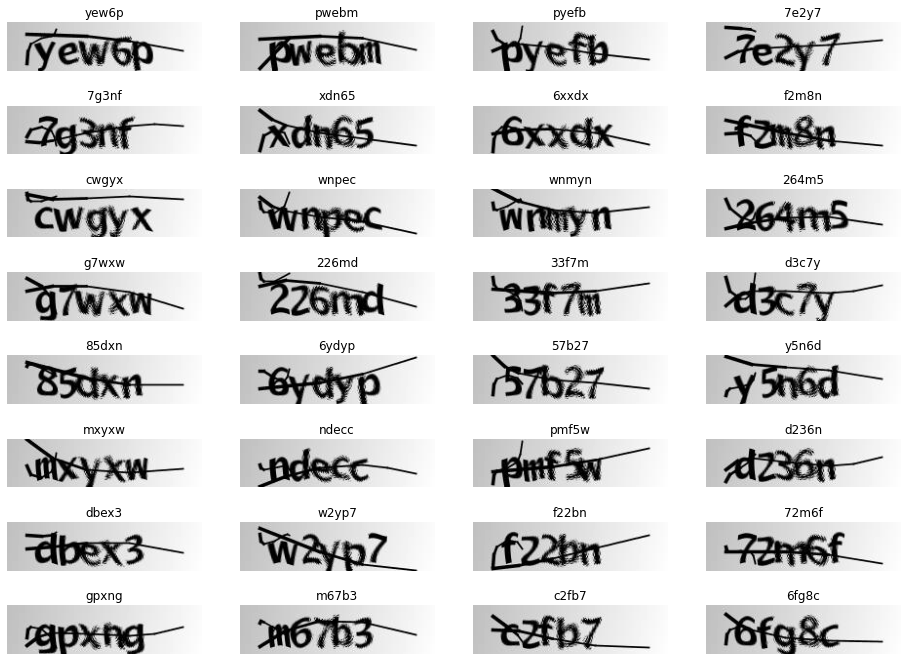

In [25]:
prediction_model = keras.models.Model(
  model.get_layer(name='image').input, model.get_layer(name='dense2').output
)

def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # greedy search 사용. 더 결과가 좋으려면 beam search 사용 가능
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode('utf-8')
        #num to char 디코더 이용
        output_text.append(res)
    return output_text

for batch in validation_dataset.take(1):
    batch_images = batch['image']

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    _, axes = plt.subplots(8, 4, figsize=(16, 12))

    for img, text, ax in zip(batch_images, pred_texts, axes.flatten()):
        img = img.numpy().squeeze()
        img = img.T
        # 세로로 이미지를 바꿨었기 떄문에 img.T를 통해 가로로 이미지를 다시 바꿔주면 보기 좋음.

        ax.imshow(img, cmap='gray')
        ax.set_title(text)
        ax.set_axis_off()